In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/Merged_data.xlsx")

# Function to fill missing values with the mean of non-missing values for each label

# Convert potential string "NA" to NaN
data.replace("NA", float("nan"), inplace=True)

# Group by 'Label(AOIs)' and fill NaN with the mean of each group
filled_data = data.copy()

# Get unique labels
labels = filled_data['Label(AOIs)'].unique()

# Iterate over each label and fill NaN values with the mean of non-NaN values for that label
for label in labels:
    label_data = filled_data[filled_data['Label(AOIs)'] == label]
    filled_data.loc[label_data.index] = label_data.fillna(label_data.mode())

# Display the filled dataset
print(filled_data)


     Respondent Name         Label(AOIs)  FixationCount  FixationDuration  \
0                 P1           guilt_ego            NaN               NaN   
1                 P1  emotion_guilt_altr           12.0            149.89   
2                 P1      logo_guilt_ego            NaN               NaN   
3                 P1      text_guilt_ego           27.0             33.56   
4                 P1            fear_ego            NaN               NaN   
...              ...                 ...            ...               ...   
3670              P9     text_inter_altr           16.0           1432.30   
3671              P9             joy_ego            NaN               NaN   
3672              P9     emotion_joy_ego            6.0            299.78   
3673              P9        logo_joy_ego            NaN               NaN   
3674              P9        text_joy_ego           17.0            249.82   

      SaccadeDuration  SaccadeAmplitude  Emotionality  Extraversion  \
0   

In [ ]:
import pandas as pd
import numpy as np

# Group by 'Label(AOIs)' and fill NaN with the mean of each group
filled_data = data.copy()

# Get unique labels
labels = filled_data['Label(AOIs)'].unique()

# Iterate over each label and fill NaN values with the mean of non-NaN values for that label
for label in labels:
    label_data = filled_data[filled_data['Label(AOIs)'] == label]
    filled_data.loc[label_data.index, ['FixationCount', 'FixationDuration', 'SaccadeDuration', 'SaccadeAmplitude']] = \
        label_data[['FixationCount', 'FixationDuration', 'SaccadeDuration', 'SaccadeAmplitude']].fillna(
            label_data[['FixationCount', 'FixationDuration', 'SaccadeDuration', 'SaccadeAmplitude']].mean()
        )

# Display the filled dataset
print(filled_data)
means = filled_data.groupby("Label(AOIs)").transform(np.mean)
df_filled = filled_data.fillna(means)

     Respondent Name         Label(AOIs)  FixationCount  FixationDuration  \
0                 P1           guilt_ego            NaN               NaN   
1                 P1  emotion_guilt_altr      12.000000        149.890000   
2                 P1      logo_guilt_ego       2.062500        214.353125   
3                 P1      text_guilt_ego      27.000000         33.560000   
4                 P1            fear_ego            NaN               NaN   
...              ...                 ...            ...               ...   
3670              P9     text_inter_altr      16.000000       1432.300000   
3671              P9             joy_ego            NaN               NaN   
3672              P9     emotion_joy_ego       6.000000        299.780000   
3673              P9        logo_joy_ego       2.534483        237.061379   
3674              P9        text_joy_ego      17.000000        249.820000   

      SaccadeDuration  SaccadeAmplitude  Emotionality  Extraversion  \
0   

<ipython-input-2-5ecfa9e629c5>:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = filled_data.groupby("Label(AOIs)").transform(np.mean)


In [ ]:
df_filled.set_index('Respondent Name',inplace=True)

In [ ]:
df_filled['Label(AOIs)']

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column
df_filled['Label(AOIs)'] = label_encoder.fit_transform(df_filled['Label(AOIs)'])

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'df_filled' is your DataFrame with missing values

# Extract the index column
index_column = df_filled.index

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed

# Impute missing values
df_filled_imputed = pd.DataFrame(imputer.fit_transform(df_filled), columns=df_filled.columns, index=index_column)


In [ ]:
df_filled_imputed

,Label(AOIs),FixationCount,FixationDuration,SaccadeDuration,SaccadeAmplitude,Emotionality,Extraversion,Agreeableness,Conscientiousness,Openness,Honesty_Humility
Respondent Name,,,,,,,,,,,
P1,15.0,10.958575,279.559194,-3432.061013,187.897756,3.0,3.3,3.6,3.3,3.5,2.8
P1,5.0,12.000000,149.890000,-5319.500000,201.750000,3.0,3.3,3.6,3.3,3.5,2.8
P1,27.0,2.062500,214.353125,-1910.348421,193.852083,3.0,3.3,3.6,3.3,3.5,2.8
P1,40.0,27.000000,33.560000,-2377.340000,207.540000,3.0,3.3,3.6,3.3,3.5,2.8
P1,13.0,10.958575,279.559194,-3432.061013,187.897756,3.0,3.3,3.6,3.3,3.5,2.8
...,...,...,...,...,...,...,...,...,...,...,...
P9,43.0,16.000000,1432.300000,-1898.970000,253.290000,3.4,2.7,2.9,3.1,3.4,3.0
P9,21.0,10.958575,279.559194,-3432.061013,187.897756,3.4,2.7,2.9,3.1,3.4,3.0
P9,11.0,6.000000,299.780000,-6236.490000,223.340000,3.4,2.7,2.9,3.1,3.4,3.0


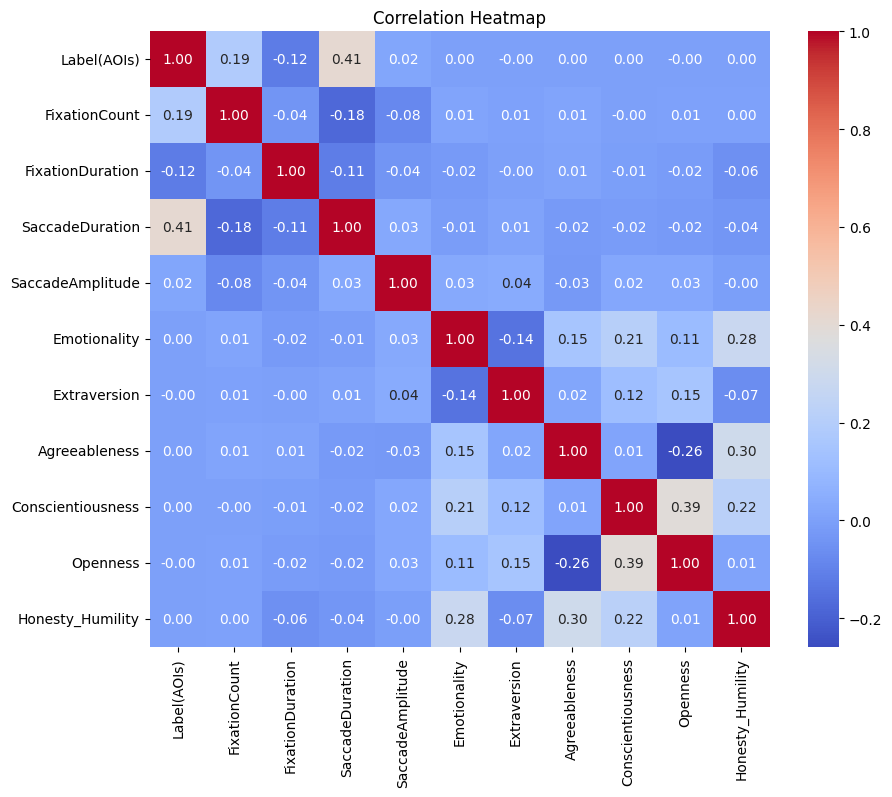

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df_filled_imputed.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




In [ ]:
# Select the relevant columns for clustering and machine learning
eye_movement_features = ['FixationCount', 'FixationDuration', 'SaccadeDuration', 'SaccadeAmplitude']
personality_traits = ['Emotionality', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Openness', 'Honesty_Humility']

from sklearn.preprocessing import StandardScaler
# Normalize the data
scaler = StandardScaler()
df_filled_imputed[eye_movement_features] = scaler.fit_transform(df_filled_imputed[eye_movement_features])



In [ ]:
import pandas as pd

# Assuming df is your DataFrame with the provided dataset

# Define the character traits columns
character_traits = ['Emotionality', 'Extraversion', 'Agreeableness', 'Conscientiousness', 'Openness', 'Honesty_Humility']

# Function to calculate the most dominant character trait for each respondent
def calculate_dominant_personality(row):
    max_personality_trait = None
    max_score = float('-inf')
    for trait in character_traits:
        if row[trait] > max_score:
            max_score = row[trait]
            max_personality_trait = trait
    return max_personality_trait

# Apply the function to each row to find the most dominant personality trait
df_filled_imputed['Most_Dominant_Personality'] = df_filled_imputed.apply(calculate_dominant_personality, axis=1)

print(df_filled_imputed)


                 Label(AOIs)  FixationCount  FixationDuration  \
Respondent Name                                                 
P1                      15.0       0.000000          0.000000   
P1                       5.0       0.132765         -0.349294   
P1                      27.0      -1.134106         -0.175648   
P1                      40.0       2.045022         -0.662657   
P1                      13.0       0.000000          0.000000   
...                      ...            ...               ...   
P9                      43.0       0.642700          3.105178   
P9                      21.0       0.000000          0.000000   
P9                      11.0      -0.632138          0.054469   
P9                      33.0      -1.073936         -0.114478   
P9                      46.0       0.770184         -0.080109   

                 SaccadeDuration  SaccadeAmplitude  Emotionality  \
Respondent Name                                                    
P1                

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming label_encoder is your LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the column 'Most_Dominant_Personality'
df_filled_imputed['Most_Dominant_Personality'] = label_encoder.fit_transform(df_filled_imputed['Most_Dominant_Personality'])

# Get the unique classes learned by the LabelEncoder
unique_classes = label_encoder.classes_

# Create a dictionary to map encoded labels to original labels
label_mapping = {label: original_label for label, original_label in enumerate(unique_classes)}

# Display the label mapping
for encoded_label, original_label in label_mapping.items():
    print(f"Encoded label {encoded_label}: Original label {original_label}")


Encoded label 0: Original label Agreeableness
Encoded label 1: Original label Conscientiousness
Encoded label 2: Original label Emotionality
Encoded label 3: Original label Extraversion
Encoded label 4: Original label Honesty_Humility
Encoded label 5: Original label Openness


In [ ]:
df_filled_imputed.columns

Index(['Label(AOIs)', 'FixationCount', 'FixationDuration', 'SaccadeDuration',
       'SaccadeAmplitude', 'Emotionality', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Openness', 'Honesty_Humility',
       'Most_Dominant_Personality'],
      dtype='object')

In [ ]:
df_filled_imputed = df_filled_imputed[[ 'FixationCount', 'FixationDuration', 'SaccadeDuration',
       'SaccadeAmplitude','Most_Dominant_Personality']]

In [ ]:
df_filled_imputed

,FixationCount,FixationDuration,SaccadeDuration,SaccadeAmplitude,Most_Dominant_Personality
Respondent Name,,,,,
P1,0.000000,0.000000,-2.410342e-16,0.000000,0
P1,0.132765,-0.349294,-1.000418e+00,0.284672,0
P1,-1.134106,-0.175648,8.065681e-01,0.122365,0
P1,2.045022,-0.662657,5.590440e-01,0.403660,0
P1,0.000000,0.000000,-2.410342e-16,0.000000,0
...,...,...,...,...,...
P9,0.642700,3.105178,8.125991e-01,1.343851,2
P9,0.000000,0.000000,-2.410342e-16,0.000000,2
P9,-0.632138,0.054469,-1.486459e+00,0.728360,2


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df contains your dataset

# Group by respondent and aggregate the features
grouped_df = df_filled_imputed.groupby('Respondent Name').agg('mean')

# Normalize/Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(grouped_df)

# Define the number of clusters
num_clusters = 3

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(grouped_df)

# Assign clusters to each respondent
grouped_df['Cluster'] = kmeans.labels_

# Merge the cluster information back to the original dataset
df_filled_imputed = df_filled_imputed.merge(grouped_df['Cluster'], how='left', on='Respondent Name')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
grouped_df

,FixationCount,FixationDuration,SaccadeDuration,SaccadeAmplitude,Most_Dominant_Personality,Cluster
Respondent Name,,,,,,
P1,0.081878,-0.118904,-0.195317,0.192575,0.0,2
P10,-0.101014,0.227496,-0.048376,-0.114774,2.0,0
P11,0.036863,-0.071502,-0.013409,-0.105991,2.0,0
P12,-0.175530,0.978955,-0.011277,-0.150739,5.0,1
P13,0.123295,-0.190712,0.121610,0.016772,5.0,1
...,...,...,...,...,...,...
P73,-0.104089,-0.157554,-0.080502,0.005318,1.0,2
P74,-0.007116,-0.110463,-0.103608,-0.169965,2.0,0
P75,0.212485,-0.266055,-0.108012,0.128246,1.0,2


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Define a list of clustering algorithms to compare
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=3),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'GMM': GaussianMixture(n_components=3)
}

# Dictionary to store evaluation results for each algorithm
evaluation_results = {}

# Iterate over each clustering algorithm
for name, algorithm in clustering_algorithms.items():
    # Fit the algorithm to the data
    algorithm.fit(grouped_df)

    # Predict cluster labels
    if hasattr(algorithm, 'labels_'):
        cluster_labels = algorithm.labels_
    else:
        cluster_labels = algorithm.predict(grouped_df)

    # Calculate evaluation metrics
    silhouette = silhouette_score(grouped_df, cluster_labels)
    davies_bouldin = davies_bouldin_score(grouped_df, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(grouped_df, cluster_labels)

    # Store evaluation results
    evaluation_results[name] = {'Silhouette': silhouette, 'Davies-Bouldin': davies_bouldin, 'Calinski-Harabasz': calinski_harabasz}

# Print evaluation results
for name, metrics in evaluation_results.items():
    print(f'{name} Evaluation Metrics:')
    for metric, value in metrics.items():
        print(f'{metric}: {value}')
    print()


KMeans Evaluation Metrics:
Silhouette: 0.6824179485534244
Davies-Bouldin: 0.4512093613428822
Calinski-Harabasz: 302.0569285165515

Agglomerative Evaluation Metrics:
Silhouette: 0.6824179485534244
Davies-Bouldin: 0.4512093613428822
Calinski-Harabasz: 302.0569285165515

DBSCAN Evaluation Metrics:
Silhouette: 0.5560531226299557
Davies-Bouldin: 1.2980495569064732
Calinski-Harabasz: 90.78671437802889

GMM Evaluation Metrics:
Silhouette: 0.6824179485534244
Davies-Bouldin: 0.4512093613428822
Calinski-Harabasz: 302.0569285165515



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
grouped_df

,FixationCount,FixationDuration,SaccadeDuration,SaccadeAmplitude,Most_Dominant_Personality,Cluster
Respondent Name,,,,,,
P1,0.081878,-0.118904,-0.195317,0.192575,0.0,2
P10,-0.101014,0.227496,-0.048376,-0.114774,2.0,0
P11,0.036863,-0.071502,-0.013409,-0.105991,2.0,0
P12,-0.175530,0.978955,-0.011277,-0.150739,5.0,1
P13,0.123295,-0.190712,0.121610,0.016772,5.0,1
...,...,...,...,...,...,...
P73,-0.104089,-0.157554,-0.080502,0.005318,1.0,2
P74,-0.007116,-0.110463,-0.103608,-0.169965,2.0,0
P75,0.212485,-0.266055,-0.108012,0.128246,1.0,2


In [ ]:


# Print the count of items in each cluster
cluster_counts = grouped_df['Cluster'].value_counts()
print("Items in each cluster:")
print(cluster_counts)



Items in each cluster:
1    28
0    27
2    20
Name: Cluster, dtype: int64


In [ ]:
grouped_df

,FixationCount,FixationDuration,SaccadeDuration,SaccadeAmplitude,Most_Dominant_Personality,Cluster
Respondent Name,,,,,,
P1,0.081878,-0.118904,-0.195317,0.192575,0.0,2
P10,-0.101014,0.227496,-0.048376,-0.114774,2.0,0
P11,0.036863,-0.071502,-0.013409,-0.105991,2.0,0
P12,-0.175530,0.978955,-0.011277,-0.150739,5.0,1
P13,0.123295,-0.190712,0.121610,0.016772,5.0,1
...,...,...,...,...,...,...
P73,-0.104089,-0.157554,-0.080502,0.005318,1.0,2
P74,-0.007116,-0.110463,-0.103608,-0.169965,2.0,0
P75,0.212485,-0.266055,-0.108012,0.128246,1.0,2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, mean_squared_error, cohen_kappa_score, confusion_matrix
from keras.models import load_model
# Split the data into features (X) and target variable (y)
X = grouped_df.drop(columns=['Cluster'])
y = grouped_df['Cluster']

# Normalize/Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)

# Callback to save the best model during training
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(3, activation='softmax'))  # Adjust output units based on number of clusters
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(3, activation='softmax'))  # Adjust output units based on number of clusters
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))  # Adjust output units based on number of clusters
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the models
cnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[checkpoint])
rnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), callbacks=[checkpoint])
lstm_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), callbacks=[checkpoint])

# Load the best model
best_model = load_model("best_model.h5")

# Make predictions using the best model
predictions = best_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1).astype(int)

# Save the results of predictions
np.save("predicted_classes.npy", predicted_classes)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predicted_classes)
rmse = mean_squared_error(y_test, predicted_classes, squared=False)
kappa = cohen_kappa_score(y_test, predicted_classes)
conf_matrix = confusion_matrix(y_test, predicted_classes)

print("Accuracy:", accuracy)
print("RMSE:", rmse)
print("Cohen's Kappa:", kappa)
print("Confusion Matrix:\n", conf_matrix)


Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 1.1367 - accuracy: 0.2500
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to best_model.h5
2/2 [==============================] - 1s 206ms/step - loss: 1.1362 - accuracy: 0.2540 - val_loss: 1.1116 - val_accuracy: 0.2500
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 1.1429 - accuracy: 0.3125
Epoch 2: val_accuracy did not improve from 0.25000
2/2 [==============================] - 0s 33ms/step - loss: 1.1169 - accuracy: 0.3016 - val_loss: 1.1102 - val_accuracy: 0.2500
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 1.1053 - accuracy: 0.2812
Epoch 3: val_accuracy did not improve from 0.25000
2/2 [==============================] - 0s 29ms/step - loss: 1.0976 - accuracy: 0.3333 - val_loss: 1.1128 - val_accuracy: 0.1667
Epoch 4/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0887 - accuracy: 0.4688
Epoch 4: val_accuracy improved from 0.25000 to 0.33333, saving

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: val_accuracy did not improve from 0.33333
2/2 [==============================] - 0s 33ms/step - loss: 1.0714 - accuracy: 0.4921 - val_loss: 1.1228 - val_accuracy: 0.3333
Epoch 6/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0714 - accuracy: 0.4688
Epoch 6: val_accuracy did not improve from 0.33333
2/2 [==============================] - 0s 55ms/step - loss: 1.0599 - accuracy: 0.5556 - val_loss: 1.1293 - val_accuracy: 0.2500
Epoch 7/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0475 - accuracy: 0.5625
Epoch 7: val_accuracy did not improve from 0.33333
2/2 [==============================] - 0s 41ms/step - loss: 1.0495 - accuracy: 0.5873 - val_loss: 1.1368 - val_accuracy: 0.1667
Epoch 8/10
1/2 [==============>...............] - ETA: 0s - loss: 1.0513 - accuracy: 0.5625
Epoch 8: val_accuracy did not improve from 0.33333
2/2 [==============================] - 0s 36ms/step - loss: 1.0404 - accuracy: 0.6032 - val_loss: 1.1450 - val_accuracy: 0.1667
Epoch 9

In [ ]:
import matplotlib.pyplot as plt

# Display the architecture of the best model
print("Architecture of the Best Model:")
best_model.summary()



In [ ]:
import matplotlib.pyplot as plt

# Create a mapping between encoded labels and original labels
label_mapping = {
    0: 'Agreeableness',
    1: 'Conscientiousness',
    2: 'Emotionality',
    3: 'Extraversion',
    4: 'Honesty_Humility',
    5: 'Openness'
}

# Group by 'Cluster' and find the most common personality type in each cluster
cluster_dominant_personality = df_filled_imputed.groupby('Cluster')['Most_Dominant_Personality'].agg(lambda x: x.value_counts().idxmax())

# Map encoded labels to original labels
cluster_dominant_personality = cluster_dominant_personality.map(label_mapping)

# Calculate the number of respondents in each cluster
cluster_counts = df_filled_imputed['Cluster'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Respondents across Clusters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Display the dominant personality type in each cluster
print("Dominant Personality in Each Cluster:")
print(cluster_dominant_personality)
